# Image Quality Control in Manufacturing

This is similar to the project we are working on in COSC 440. Template matching is applied to a template image and a image for comparison. In this case, the template is a single hexnut and the comparison image is two hextnuts of different orientations.

[Background information about project]

This project is built on and used with OpenCV. The main function used in the scope of this project is matchTemplate().

## Section 1. Overview of All Methods.

This section will generate and display an overall view of all methods in action. A later section will break these up and singularily display the results.

In [3]:
# imports
import cv2 as cv2
import numpy as np
from matplotlib import pyplot as plt


In [4]:
#get template and compairson
img = cv2.imread('Hexnut.jpg',0)
img2 = img.copy()
template = cv2.imread('duoHex.jpg',0)
w, h = template.shape[::-1]

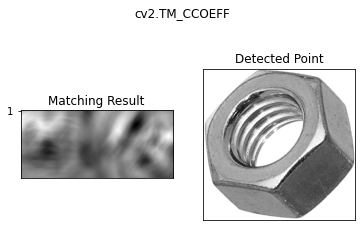

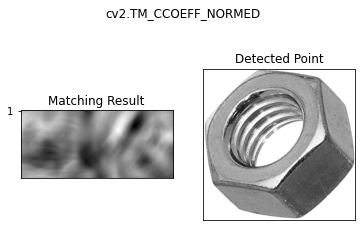

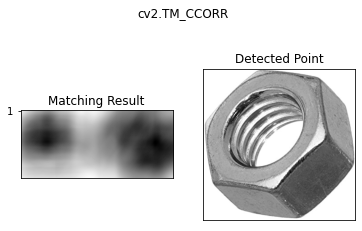

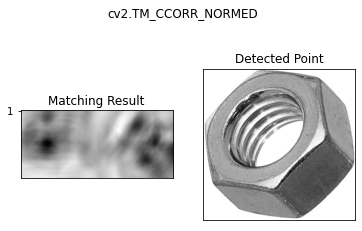

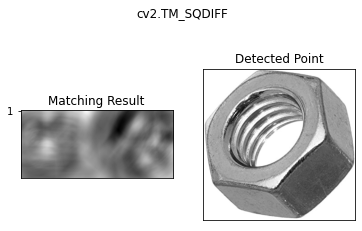

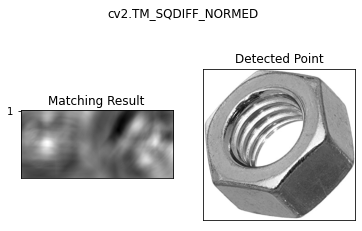

In [5]:
methods = ['cv2.TM_CCOEFF','cv2.TM_CCOEFF_NORMED','cv2.TM_CCORR','cv2.TM_CCORR_NORMED','cv2.TM_SQDIFF','cv2.TM_SQDIFF_NORMED']

for meth in methods:
    img = img2.copy()
    method = eval(meth)
    
    
    #Apply template matching
    res = cv2.matchTemplate(img,template,method)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
    
    
    #If the method in TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)
    
    cv2.rectangle(img,top_left, bottom_right, 255, 2)
    
    plt.subplot(121),plt.imshow(res,cmap='gray')
    plt.title('Matching Result'), plt.xticks([]),plt.yticks([1])
    plt.subplot(122),plt.imshow(img,cmap='gray')
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    plt.suptitle(meth)
    
    plt.show()

In [6]:
#import images
duoHex_img = cv2.imread('duoHex.jpg', cv2.IMREAD_UNCHANGED)
soloHex_img = cv2.imread('Hexnut.jpg', cv2.IMREAD_UNCHANGED)

In [7]:
#show images (dual hexnuts)
cv2.imshow('Duo Hex', duoHex_img)
cv2.waitKey()
cv2.destroyAllWindows()

In [18]:
#show images (singular hexnut)
cv2.imshow('Solo', soloHex_img)
cv2.waitKey()
cv2.destroyAllWindows()

## Differing Methods

# 1.2 Variations in the Different Methods.

In this section, we are going to individually break down each method. The methods of choice are:
1. TM_SQDIFF
2. TM_SQDIFF_NORMED
3. TM_CCORR
4. TM_CCORR_NORMED
5. TM_CCOEFF
6. TM_CCOEFF_NORMED

These are the enumeration types. 
1. TM_SQDIFF
    
    A brief mathematical explanation of the enumerator is best explained by:
    


## TM_SQDIFF Method

In [20]:
#generate result for TM_SQDIFF
result1 = cv2.matchTemplate(duoHex_img, soloHex_img, cv2.TM_SQDIFF)

In [30]:
#show result (heat map simiarity for TM_SQDIFF)
cv2.imshow('TM_SQDIFF', result1)
cv2.waitKey()
cv2.destroyAllWindows()

Important to note that there is nothing really generated here. 

## TM_SQDIFF_NORMED Method

In [31]:
#generate result for TM_SQDIFF_NORMED
result2 = cv2.matchTemplate(duoHex_img, soloHex_img, cv2.TM_SQDIFF_NORMED)

In [32]:
cv2.imshow('TM_SQDIFF_NORMED', result2)
cv2.waitKey()
cv2.destroyAllWindows()

Results from this method are a little more interesting. There really is not anything concrete evidence wise, but an improvement from the TM_SQDIFF method.


## TM_CCORR Method

In [24]:
#generate result for TM_CCORR method
result3 = cv2.matchTemplate(duoHex_img, soloHex_img, cv2.TM_CCORR)

In [33]:
cv2.imshow('TM_CCORR', result3)
cv2.waitKey()
cv2.destroyAllWindows()

Here the evidence is compelling as nothing of value is produced.

## TM_CCORR_NORMED Method

In [34]:
#generate result for TM_CCORR_NORMED method
result4 = cv2.matchTemplate(duoHex_img, soloHex_img, cv2.TM_CCORR_NORMED)

In [35]:
cv2.imshow('TM_CCORR_NORMED', result4)
cv2.waitKey()
cv2.destroyAllWindows()

Here the evidence is compelling as nothing of value is produced.

## TM_CCOEFF Section

In [36]:
result5 = cv2.matchTemplate(duoHex_img, soloHex_img, cv2.TM_CCOEFF)

In [37]:
#show result (heat map similarity for TM_CCOEFF)
cv2.imshow('TM_CCOEFF', result5)
cv2.waitKey()
cv2.destroyAllWindows

<function destroyAllWindows>

Here there is a new development. Fractal similar lines are now generated

## TM_CCOEFF_NORMED Section

In [10]:
result6 = cv2.matchTemplate(duoHex_img, soloHex_img, cv2.TM_CCOEFF_NORMED)

In [13]:
#show result (heat map similarity for TM_CCOEFF_NORMED)
cv2.imshow('TM_CCOEFF_NORMED', result6)
cv2.waitKey()
cv2.destroyAllWindows()

Here the result is a bit better, and out of the other methods tested so far show the best compairison.